In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

### 1. Data Understanding 

#### a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). Print the number of rows, cols and  types of variables? 

In [2]:
df = pd.read_csv('data_set.csv')

NameError: name 'pd' is not defined

In [155]:
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1502675606516230,photo,2435,2756,591,2620,2054,2589,2786,1043,355
1,246675545449582_1497272363723221,link,2832,2404,492,1099,1787,2293,1946,1211,388
2,246675545449582_1495724170544707,photo,1795,1474,751,2031,2615,2902,2100,1180,382
3,246675545449582_1492286100888514,photo,1974,1102,706,1467,1791,1725,2545,1091,364
4,246675545449582_1491577434292714,photo,1926,1686,719,1743,1701,2930,1580,1284,403


In [156]:
df.shape

(1256, 11)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 11 columns):
status_id        1256 non-null object
status_type      1256 non-null object
num_reactions    1256 non-null int64
num_comments     1256 non-null int64
num_shares       1256 non-null int64
num_likes        1256 non-null int64
num_loves        1256 non-null int64
num_wows         1256 non-null int64
num_hahas        1256 non-null int64
num_sads         1256 non-null int64
num_angrys       1256 non-null int64
dtypes: int64(9), object(2)
memory usage: 108.0+ KB


<b>Inferences:</b>
<ol>
    <li>The data has two object type columns. They are status_id and status_type</li>
    <li>There are a total of 9 numerical columns</li>
    <li>The data has 1256 rows</li>

#### b Calculate five-point summary for numerical variables 

In [158]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,2095.538217,1940.698248,676.113854,2025.598726,2086.928344,2055.230096,2036.652070,1192.673567,384.536624
std,513.125650,588.804174,128.279267,552.038960,572.046813,653.607336,530.425486,106.090370,21.224850
min,906.000000,858.000000,406.000000,813.000000,773.000000,861.000000,881.000000,957.000000,337.000000
25%,1736.000000,1426.750000,574.000000,1563.750000,1692.750000,1459.500000,1608.000000,1131.000000,372.000000
50%,2147.500000,1836.000000,663.000000,2030.500000,2056.000000,2090.000000,2104.000000,1179.000000,382.000000
75%,2502.250000,2437.500000,766.000000,2500.250000,2533.250000,2681.250000,2343.500000,1278.000000,402.000000
max,3176.000000,3173.000000,973.000000,3111.000000,3256.000000,3160.000000,3214.000000,1424.000000,431.000000


In [159]:
df.select_dtypes(include = 'object').describe()

,status_id,status_type
count,1256,1256
unique,1256,4
top,246675545449582_886471714803292,photo
freq,1,667


#### c. Is there any categorical feature present in this data ? 

In [1]:
df.select_dtypes(include = 'object').describe()

NameError: name 'df' is not defined

<b>Inferences:</b>
<ul>
    <li>There are two catagorical columns in this dataset.</li>
    <li>One is a unique identifier while the other is the status type of the post.</li>
    <li>Since one is a identification columns, we can drop it as it does not help is clustering or dimensionality reduction algorithms.</li>

#### d. Generate the covariance and correlation tables for the data

<b>Covariance Table and Heatmap</b>

In [161]:
df.cov()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,263297.933200,31367.494011,-65823.197582,72911.596224,-37466.121562,23470.277654,-2638.833306,529.918461,108.636846
num_comments,31367.494011,346690.355885,-7844.486733,-25443.890903,-33137.283791,-7056.726529,21127.500506,-4232.956748,-851.834757
num_shares,-65823.197582,-7844.486733,16455.570294,-18226.151090,9364.862348,-5858.468449,654.185461,-131.373163,-26.932062
num_likes,72911.596224,-25443.890903,-18226.151090,304747.013353,-11764.726785,-114237.434288,-10299.436938,2058.879265,415.117497
num_loves,-37466.121562,-33137.283791,9364.862348,-11764.726785,327237.556614,55146.563911,-3802.197860,758.270614,158.700634
num_wows,23470.277654,-7056.726529,-5858.468449,-114237.434288,55146.563911,427202.550201,-44495.881632,8897.299872,1782.113877
num_hahas,-2638.833306,21127.500506,654.185461,-10299.436938,-3802.197860,-44495.881632,281351.195980,-56272.833985,-11257.199598
num_sads,529.918461,-4232.956748,-131.373163,2058.879265,758.270614,8897.299872,-56272.833985,11255.166663,2251.554594
num_angrys,108.636846,-851.834757,-26.932062,415.117497,158.700634,1782.113877,-11257.199598,2251.554594,450.494275


<b>Correlation Matrix and Heatmap</b>

In [162]:
df.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.103821,-0.999997,0.257397,-0.127639,0.069981,-0.009695,0.009734,0.009975
num_comments,0.103821,1.000000,-0.103857,-0.078279,-0.098382,-0.018336,0.067648,-0.067764,-0.068162
num_shares,-0.999997,-0.103857,1.000000,-0.257376,0.127618,-0.069873,0.009614,-0.009653,-0.009892
num_likes,0.257397,-0.078279,-0.257376,1.000000,-0.037255,-0.316608,-0.035174,0.035155,0.035429
num_loves,-0.127639,-0.098382,0.127618,-0.037255,1.000000,0.147493,-0.012531,0.012494,0.013071
num_wows,0.069981,-0.018336,-0.069873,-0.316608,0.147493,1.000000,-0.128345,0.128311,0.128462
num_hahas,-0.009695,0.067648,0.009614,-0.035174,-0.012531,-0.128345,1.000000,-0.999996,-0.999911
num_sads,0.009734,-0.067764,-0.009653,0.035155,0.012494,0.128311,-0.999996,1.000000,0.999912
num_angrys,0.009975,-0.068162,-0.009892,0.035429,0.013071,0.128462,-0.999911,0.999912,1.000000


##### e. Create Visualization plots to find the relationship amongst the variables. 

<b>Covariance Heatmap</b>

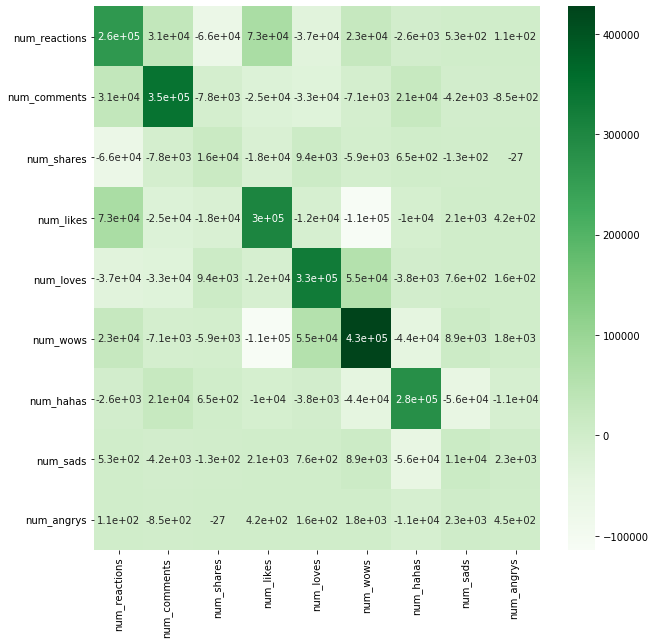

In [163]:
plt.figure(figsize = (10,10))
sns.heatmap(df.cov(), annot = True, cmap = 'Greens')

<b>Correlation Heatmap</b>

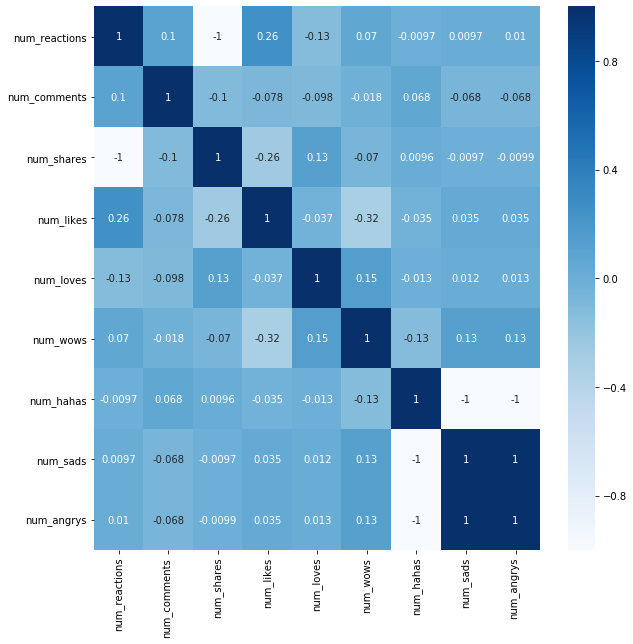

In [164]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),vmin = -1, cmap = 'Blues', annot = True)

## Labeling the catagorical columns

In [165]:
df.drop(['status_id'], axis = 1, inplace = True)

In [166]:
df = pd.concat([df,pd.get_dummies(df['status_type'], drop_first=True)], axis = 1)

In [167]:
df.drop(columns = ['status_type'], axis = 1, inplace = True)

### 2a.  Will PCA can be applicable on this data ? 

### 2b.  Print the top 5 eigen values and eigen vectors. Howmuch pecentage of varaiance in the data is explained by this top 5 principle components cummulatively ? 

#### 2a. Will PCA can be applicable on this data ? (5 marks)

In [168]:
def scatter_coefficient(X, normalize = True):
    corr = np.corrcoef(X,rowvar = False)
    if normalize:
        return np.linalg.det(corr)/np.trace(corr)
    else:
        return np.linalg.det(corr)

In [169]:
print(scatter_coefficient(df,False))

2.932385605577728e-16


<b>Inferences:</b>

This coefficient above tells us the how significantly uncorrelated or correlated a dataset it.

The low value indicates that the dataset is significantly correlated for us to use PCA and get strong principle components that explain a lot of the data. 

Since we now know that the dataset is correlated enough for us to succesfully use PCA, we shall do so.

#### 2b. Print the top 5 eigen values and eigen vectors. Howmuch pecentage of varaiance in the data is explained by this top 5 principle components cummulatively ? 

In [192]:
X = df

In [193]:
#scaling the data
l = X.columns
sc = StandardScaler()
scaled = sc.fit_transform(X)
X_std = pd.DataFrame(scaled, columns = l)

In [194]:
pca = PCA(0.99)

In [195]:
X_tran = pca.fit_transform(X_std)

In [196]:
eig_vectors = pca.components_

In [197]:
eig_values = pca.explained_variance_

In [198]:
eig_perc = pca.explained_variance_ratio_*100

In [199]:
f = [0,1,2,3,4]
tot = []
for i in f:
    print('The Eigen Value of the Principal Component Number',i+1,'is:',eig_values[i])
    print('The Eigen-Vector of the Principal Component Number',i+1,'is:',eig_vectors[i])
    print('The varaince explained by the Principal Component Number',i+1,'is:',eig_perc[i],'\n\n')
    tot.append(eig_perc[i])

The Eigen Value of the Principal Component Number 1 is: 3.037913671372038
The Eigen-Vector of the Principal Component Number 1 is: [-2.03985175e-02  5.69674143e-02  2.03468553e-02 -2.08126507e-02
 -1.84179375e-02 -1.07468756e-01  5.72275174e-01 -5.72274831e-01
 -5.72285511e-01  5.66093819e-04  3.11587697e-02 -1.11106939e-02]
The varaince explained by the Principal Component Number 1 is: 25.29579125246753 


The Eigen Value of the Principal Component Number 2 is: 2.164578618462843
The Eigen-Vector of the Principal Component Number 2 is: [-6.59230739e-01 -1.14311771e-01  6.59230857e-01 -2.96807846e-01
  1.67917819e-01  2.85952181e-02 -1.20637795e-02  1.20466106e-02
  1.19283267e-02 -1.20475688e-02  8.67551836e-03 -5.03523330e-05]
The varaince explained by the Principal Component Number 2 is: 18.023793565358723 


The Eigen Value of the Principal Component Number 3 is: 1.8458094930271423
The Eigen-Vector of the Principal Component Number 3 is: [-0.00163367  0.08451776  0.00165294 -0.00767

In [200]:
print('The total variance percentage explained by the first 5 Principal Components is:',np.sum(tot),'%')

The total variance percentage explained by the first 5 Principal Components is: 79.1491711476164 %


### 3. Build the clustering model on PCA dimensions which are extracting 95 percentage of variance in the original data 

In [201]:
#scaling the dataset
l = X.columns
sc = StandardScaler()
scaled = sc.fit_transform(X)
X_std = pd.DataFrame(scaled, columns = l)

In [202]:
#building the PCA Components
pca2 = PCA(0.95)
X_trans = pca2.fit_transform(X_std)

In [203]:
X_trans = pd.DataFrame(X_trans)
X_trans.head()

,0,1,2,3,4,5,6
0,2.356349,-1.402629,-1.179964,0.372150,-0.725939,0.110589,0.835008
1,-0.299056,-1.545841,0.260932,1.652394,-0.650919,0.945532,-0.286155
2,0.027753,1.033088,-1.380784,0.721838,-0.024927,-1.209963,-0.143727
3,1.665010,0.623448,-1.312893,-0.158398,0.161935,-0.211386,-1.457268
4,-1.615240,0.582215,-1.317551,0.723005,-0.381000,0.285720,-0.983517


#### a. Find the optimal number of clusters. 

In [204]:
n = [i+1 for i in range(13)]
inertia = []
for i in n:
    km = KMeans(n_clusters=i)
    km.fit(X_trans)
    inertia.append(km.inertia_)

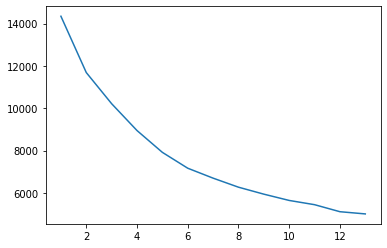

In [205]:
sns.lineplot(x = n,y = inertia)

<b>Inferences</b>

<p>We find that the optimum number of clusters we make is at 6 since we see that in the elbow plot there is a sharp decrease in Within Sum of Squares at 6 clusters.</p>

#### b.	Apply Clustering with optimal value of k and find out if the data points have been clustered correctly using appropriate visualization


In [206]:
km = KMeans(n_clusters=6)
km.fit(X_trans)

KMeans(n_clusters=6)

In [207]:
y_kmeans = km.predict(X_trans)
X_trans['Cluster'] = y_kmeans

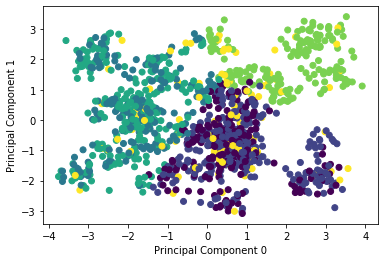

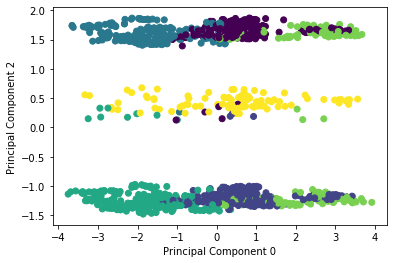

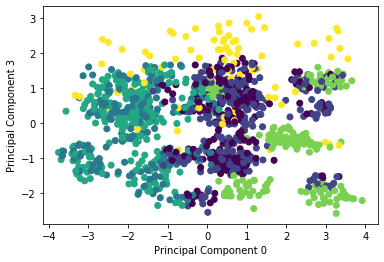

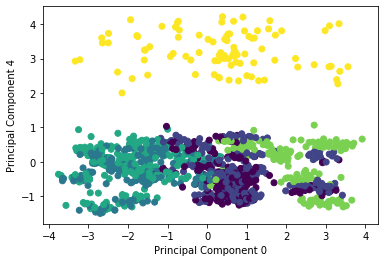

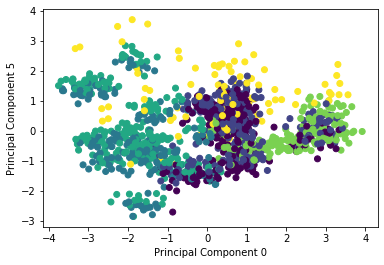

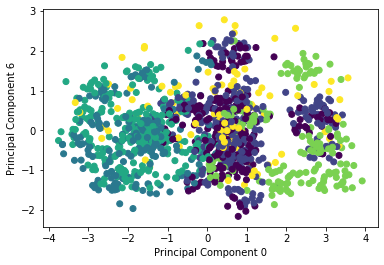

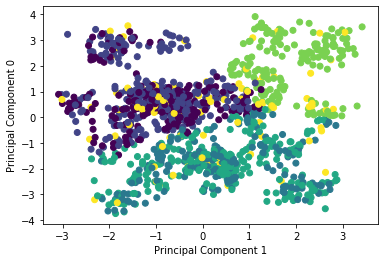

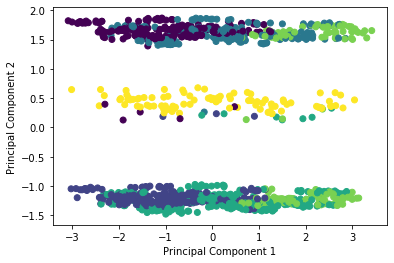

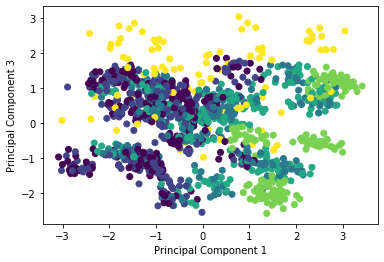

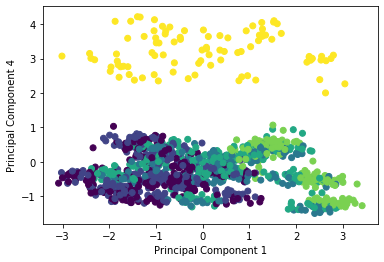

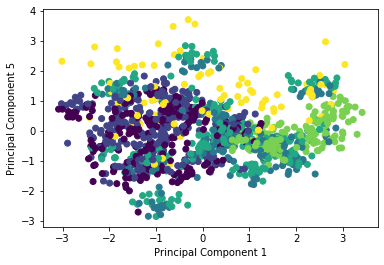

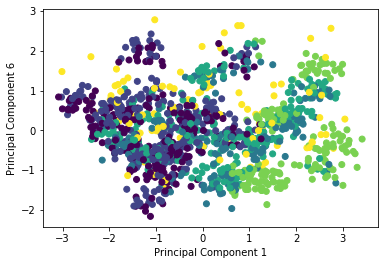

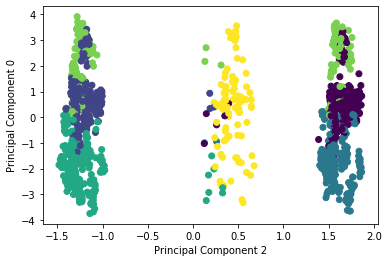

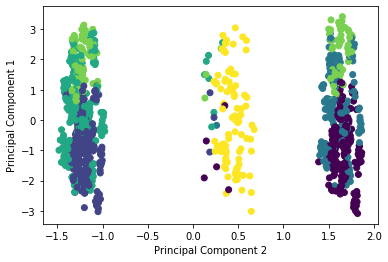

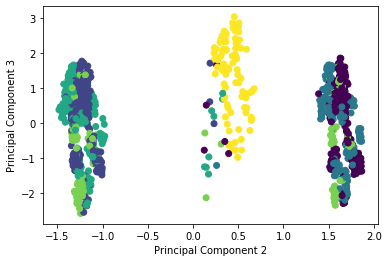

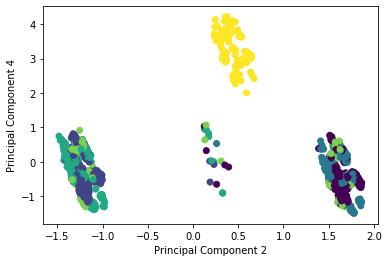

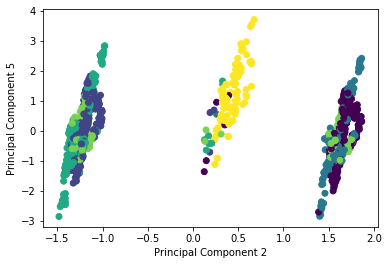

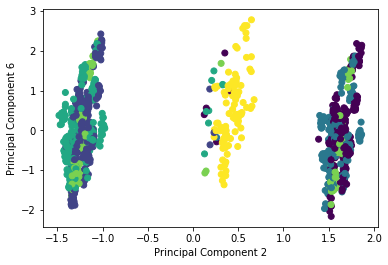

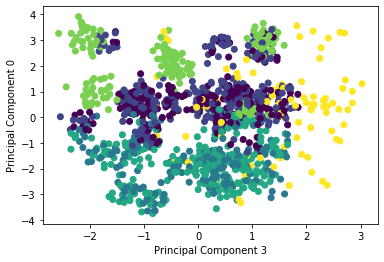

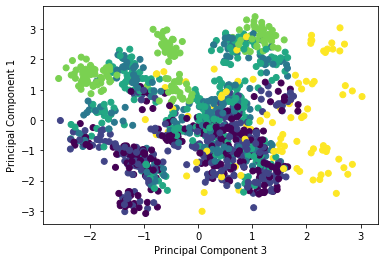

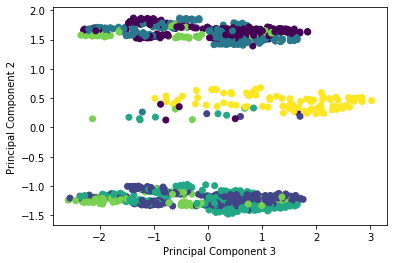

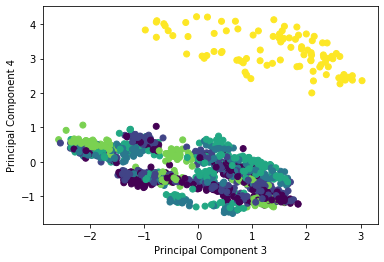

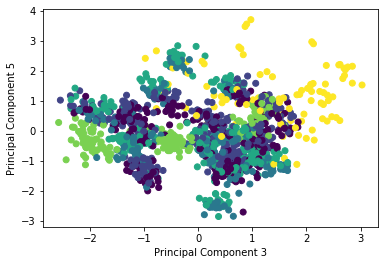

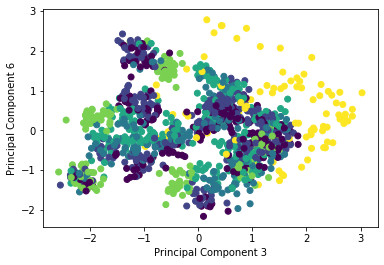

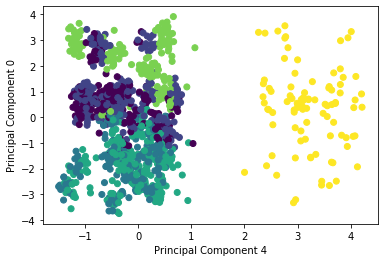

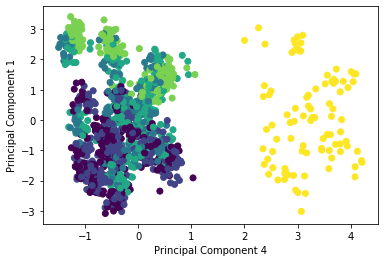

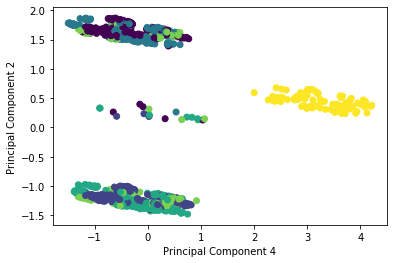

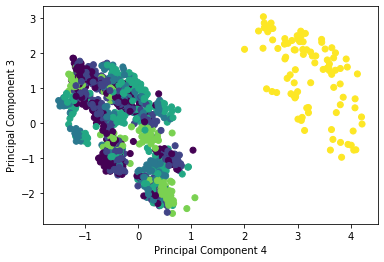

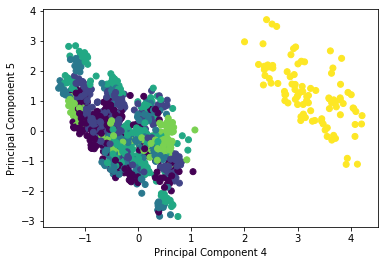

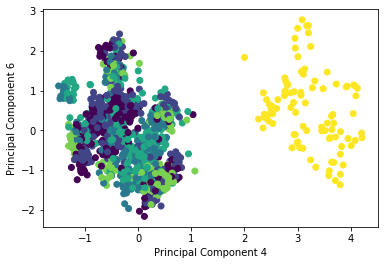

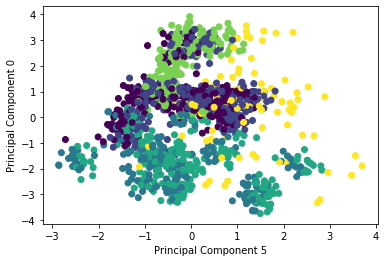

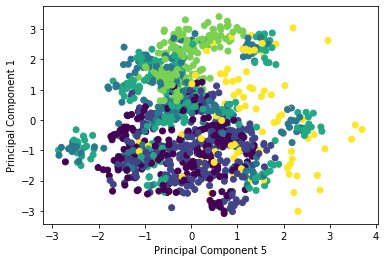

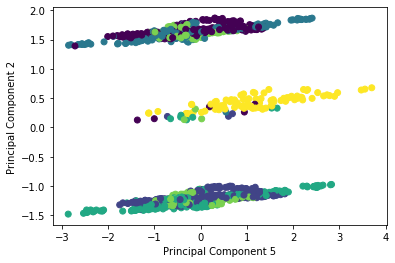

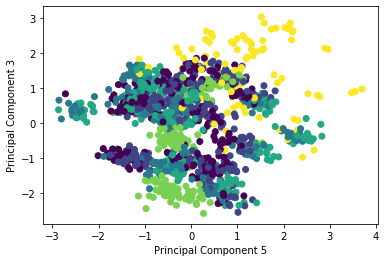

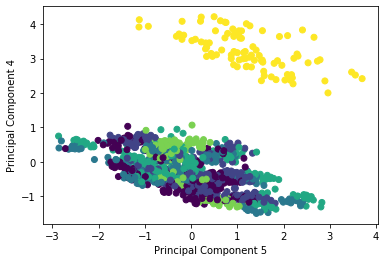

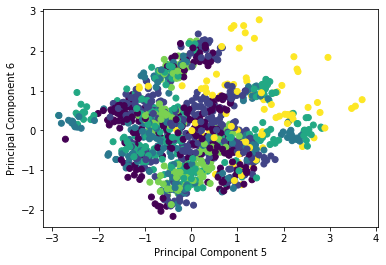

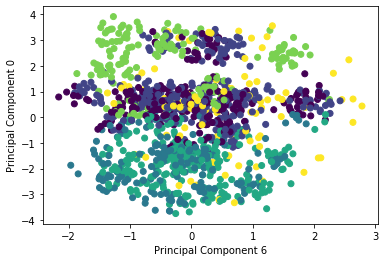

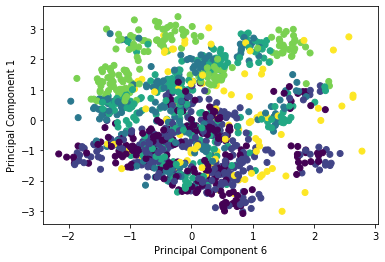

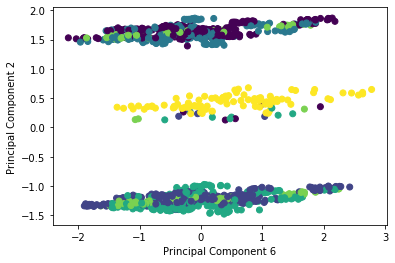

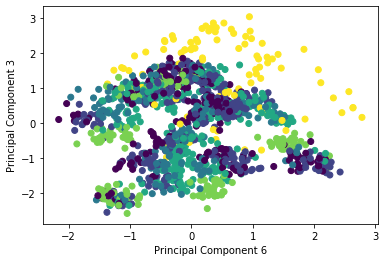

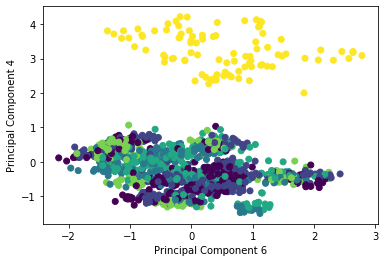

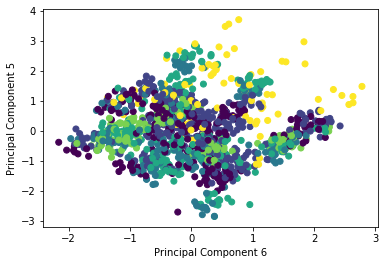

In [208]:
for i in X_trans.columns:
    for j in X_trans.columns:
        if (i == j) or (i == 'Cluster') or (j=='Cluster'):
            continue
        else:
            plt.scatter(X_trans[i],X_trans[j], c=X_trans['Cluster'])
            X1 = "Principal Component " + str(i)
            Y1 = "Principal Component " + str(j)
            plt.xlabel(X1)
            plt.ylabel(Y1)
            plt.show()


#### c.	Evaluate the quality of clusters formed using appropriate metrics to support the model built. 

In [210]:
#Using Different Metrics to Judge how good the Clusters are

print('The Silhouette Score of the Clusters are:', silhouette_score(X,y_kmeans))
print('The Calinski Harabaz Score of the Clusters are:', calinski_harabasz_score(X,y_kmeans))
print('The Davies Bouldin  Score of the Clusters are:', davies_bouldin_score(X,y_kmeans))

The Silhouette Score of the Clusters are: 0.01613181231496308
The Calinski Harabaz Score of the Clusters are: 61.07535116998121
The Davies Bouldin  Score of the Clusters are: 14.183494481788346


<b>Inferences:</b>

<ul>
    <li>The silhouette score of the clusters is quite low. This indicates that the clusters are good and go not overlap</li>
    <li>The Calinski Harabaz Score indicates how far the clusters are. Given the value of 61, this indicates that the clusters are suffieciently far apart for us to say with confidence that they are good clusters.</li>
    <li>The smalled the Davies Bouldin Index the better. A David Bouldin Index of 14 indicates that the clusters are good enough for our business requirement</li>

#### d. Write down a business interpretation/explanation of the model – Use the cluster centroids to make the business inferences for each cluster groups

In [212]:
dff = pd.read_csv('data_set.csv')

In [214]:
dff['Cluster'] = y_kmeans

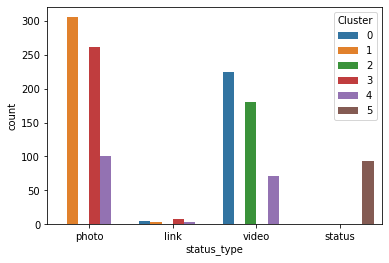

In [215]:
sns.countplot(dff['status_type'], hue=dff['Cluster'])

<b>Inferences:</b>

<ol>
    <li>It appears that of those who post photos, most belong to cluster 1. These could be 'Active Members'</li>
    <li>Cluster 0 and Cluster 2 could be 'Video Creators' as they post barely any photos but the most videos.</li>
    <li>Cluster 3 and Cluster 1 Could be 'Models' as they post only photos and not many videos</li>
    <li>We see only one cluster of people posting Status's. We need to identify why that is and what characterisitc of their's is different from the rest and how we could cater to them more.</li>
    <li>Cluster 4 could be the 'Average User' as the post a moderate amount of photos and videos. </li>
</ol>

After identifying these characteristics of different clusters, we can now cater better products and services modified and 'localized' to specifically cater to each of the different clusters of users.

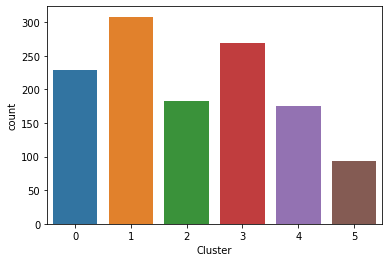

In [223]:
sns.countplot(dff['Cluster'])

<b>Inferences:</b>
<ul>
    <li>The most number of users belong to Cluster 1 and the least to cluster 5.</li>
  
<strong>We can identfiy what attracts more users of cluster 1 and market those specific features to the public.</strong>

Cluster 5 has the least number of users. We must identify why this is so and what we can do to attract more customers that are a part of Cluster 5.

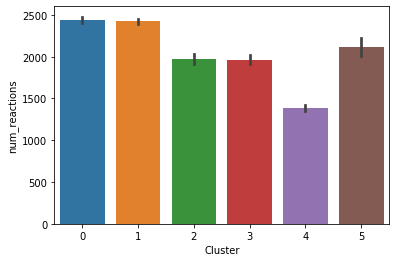

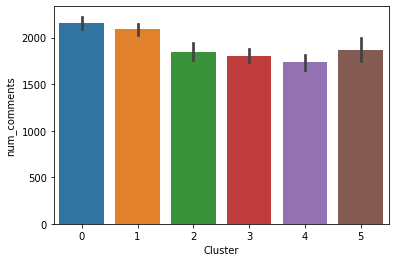

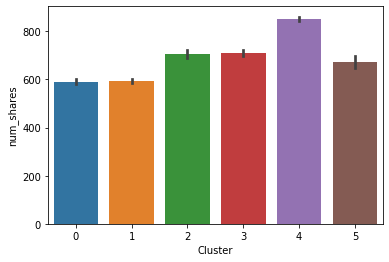

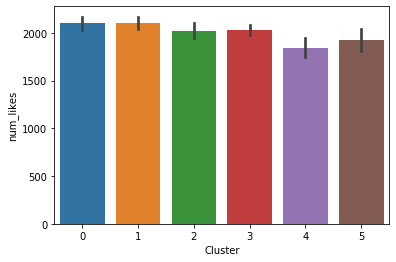

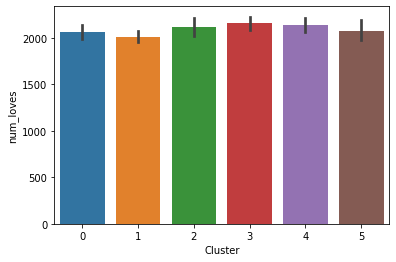

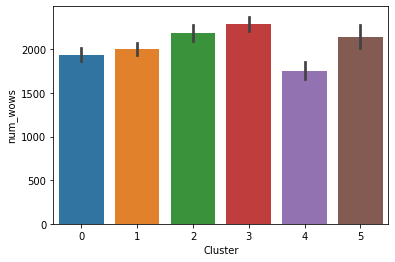

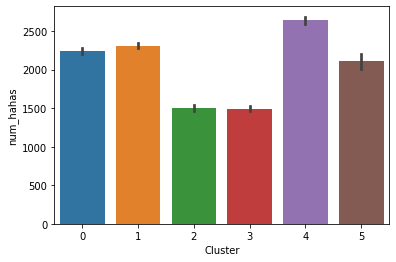

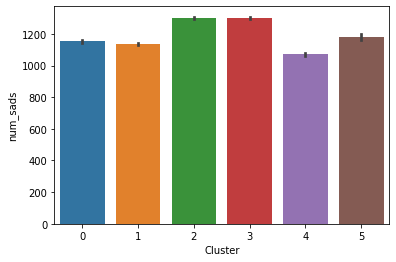

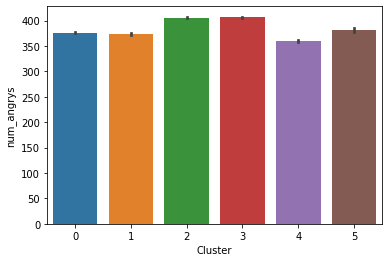

In [222]:
l = dff.select_dtypes(include = 'number').drop(columns = ['Cluster']).columns
for i in l:
    sns.barplot(y = dff[i], x = dff['Cluster'])
    plt.show()

<b>Inferences:</b>
<ul>
    <li>Cluster 5, 0 and 1 has the most number of reactions.</li>
    <li>Cluster 4 shares the most posts. We can identify why this is so.<li>
    <li>Cluster 3 reacts with the most number of loves.</li>
    <li>Cluster 4 has the significantly smallest number of 'wow' reactions. We can identify why this is the case.</li>
    <li>Cluster 4 has more number of 'hahas' than any other cluster</li>
</ul>